# Mean Reversion Strategy

Hypothesis - Whenever the current forex rates' trend is upward the associated forward rates' trend is also upward. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline 

quandl.ApiConfig.api_key = "gFgzypBFboDs4LdBHysy"

In [21]:
start = '2020-03-16'
end = '2020-08-17'

In [22]:
# USD/INR Rates
ui = quandl.get("FRED/DEXINUS",start_date = start, end_date= end)

<AxesSubplot:xlabel='Date'>

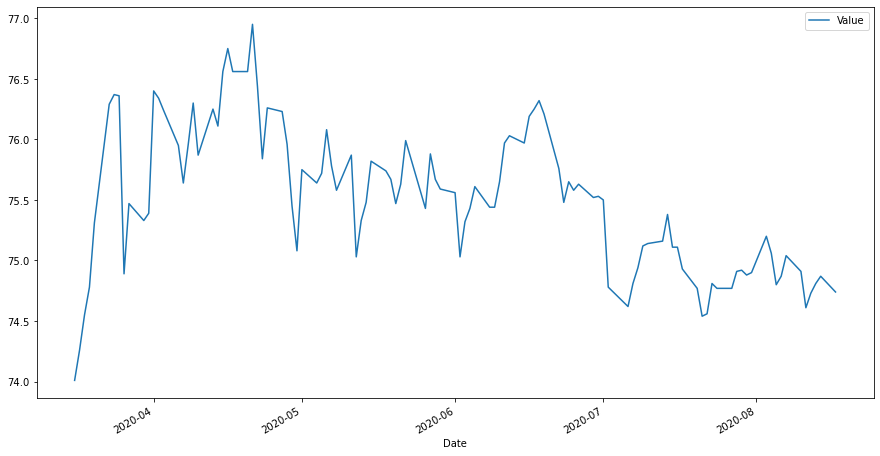

In [23]:
ui.plot(figsize = (15,8))

In [43]:
ui['mu'] = [ui['Value'][:i].mean() for i in range(len(ui))]
mu_15d = ui['Value'].rolling(15).mean()
std_15d = ui['Value'].rolling(15).std()

ui.tail()

,Value,mu
Date,,
2020-08-11,74.61,75.535962
2020-08-12,74.73,75.527143
2020-08-13,74.81,75.519623
2020-08-14,74.87,75.512991
2020-08-17,74.74,75.507037


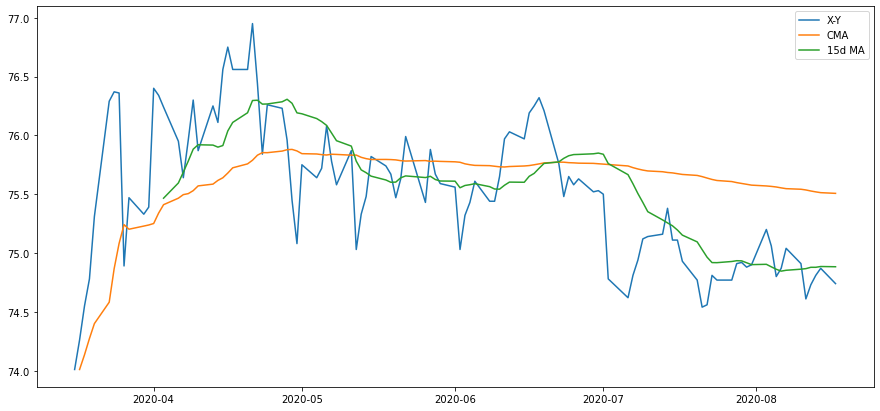

In [44]:
plt.figure(figsize=(15,7))
plt.plot(ui['Value'], label='X-Y')
plt.plot(ui['mu'], label='CMA')
plt.plot(mu_15d, label='15d MA')
plt.legend();

In [45]:
start = '2020-07-16'
end = '2020-08-17'

ui_test = quandl.get("FRED/DEXINUS",start_date = start, end_date= end)

In [59]:
# Compute the z-scores for each day using the historical data up to that day
zscores = (ui['Value'] - mu_15d) / std_15d


HP = 60
for i in range(len(ui_test)):
    # Buy Forward Contracts if the z-score is > 1
    if (HP>=100):
        HP = 100
        break
    if zscores[i] > 1:
        HP += 15
    elif zscores[i] > 0.5:
        HP += 7
    elif zscores[i] > 0:
        HP += 4
    
if (HP>=100):
    HP = 100        
        
print('Hedge Percentage is ',HP)

Hedge Percentage is  100


In [60]:
start = '2020-08-17'
end = '2020-09-16'

ui_real = quandl.get("FRED/DEXINUS",start_date = start, end_date= end)

In [61]:
HP = 60
for i in range(len(ui_real)):
    # Buy Forward Contracts if the z-score is > 1
    if (HP>=100):
        HP = 100
        break
    if zscores[i] > 1:
        HP += 15
    elif zscores[i] > 0.5:
        HP += 7
    elif zscores[i] > 0:
        HP += 4
    
if (HP>=100):
    HP = 100        
        
print('Hedge Percentage is ',HP)

Hedge Percentage is  93
